In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Reading each individual sheet, making each sheet into a dataframe

# Path to original file
xls = pd.ExcelFile('./Resources/CU_Project_1_final.xlsx')

# Renaming each sheet into a dataframe
top_drugs_df = pd.read_excel(xls, 'Top 10 Drugs All Years')

#top_2021_df = pd.read_excel(xls, 'Top 10 Drugs of 2021')
#top_2020_df = pd.read_excel(xls, 'Top 10 Drugs of 2020')
#top_2019_df = pd.read_excel(xls, 'Top 10 Drugs of 2019')
#top_2018_df = pd.read_excel(xls, 'Top 10 Drugs of 2018')
#top_2017_df = pd.read_excel(xls, 'Top 10 Drugs of 2017')
#top_2016_df = pd.read_excel(xls, 'Top 10 Drugs of 2016')
#top_2015_df = pd.read_excel(xls, 'Top 10 Drugs of 2015')
#top_2014_df = pd.read_excel(xls, 'Top 10 Drugs of 2014')
#top_2013_df = pd.read_excel(xls, 'Top 10 Drugs of 2013')
#ator_df = pd.read_excel(xls, 'Atorvastatin')
#lisin_df = pd.read_excel(xls, 'Lisinopril')
#met_df = pd.read_excel(xls, 'Metformin')

top_drugs_df

,Year,Drug Name,Brand Name,Total Prescriptions,Total Patients,Drug Class,Total Cost Per Prescription,Out of Pocket Cost Per Prescription
0,2021,Atorvastatin,Lipitor,116702335,28111470,Cholesterol lowering,19.58,4.83
1,2021,Metformin,Glucophage,91151043,19883763,Anti-diabetic,61.58,4.40
2,2021,Levothyroxine,Synthroid,89309050,19064382,Thyroid Hormone Replacement,23.92,12.01
3,2021,Lisinopril,Prinivil/Zestril,88272557,20475892,Anti-hypertensive,10.94,3.93
4,2021,Amlodipine,Norvasc,73569606,17734288,Anti-hypertensive,8.99,3.85
...,...,...,...,...,...,...,...,...
85,2013,Omeprazole,Prilosec,67642688,13210834,Antacid (PPI),45.86,7.49
86,2013,Atorvastatin,Lipitor,65174783,13077835,Cholesterol lowering,71.26,11.65
87,2013,Amlodipine,Norvasc,62816160,11513217,Anti-hypertensive,24.31,6.81
88,2013,Acetaminophen; Hydrocodone,Vicodin,58483370,19957098,Analgesic,22.42,8.19


In [3]:
# Value counts of unique medications listed through the years

# List the unique drug names
drug_names = top_drugs_df["Drug Name"]
unique_drug_names = drug_names.unique()
#print(unique_drug_names)

unique_drug_names_count = top_drugs_df['Drug Name'].value_counts()
unique_drug_names_count

Drug Name
Atorvastatin                  9
Metformin                     9
Levothyroxine                 9
Lisinopril                    9
Amlodipine                    9
Metoprolol                    9
Omeprazole                    9
Albuterol                     7
Losartan                      6
Simvastatin                   6
Gabapentin                    3
Acetaminophen; Hydrocodone    3
Hydrochlorothiazide           2
Name: count, dtype: int64

In [4]:
# Grouping each individual drug by making lists

total_costs = top_drugs_df["Total Cost Per Prescription"]
out_of_pocket_costs = top_drugs_df["Out of Pocket Cost Per Prescription"]

ator = top_drugs_df[drug_names == "Atorvastatin"]
met = top_drugs_df[drug_names == "Metformin"]
levo = top_drugs_df[drug_names == "Levothyroxine"]
lisin = top_drugs_df[drug_names == "Lisinopril"]
amlo = top_drugs_df[drug_names == "Amlodipine"]
meto = top_drugs_df[drug_names == "Metoprolol"]
omepra = top_drugs_df[drug_names == "Omeprazole"]

In [5]:
# Value count of types of medications filled in 2013

years = top_drugs_df["Year"]
drug_class = top_drugs_df["Drug Class"]

year_2013 = '2013'
filtered_year_2013 = top_drugs_df[top_drugs_df['Year'] == 2013]
drug_class_counts_2013 = filtered_year_2013['Drug Class'].value_counts()
drug_class_counts_2013

Drug Class
Anti-hypertensive              3
Cholesterol lowering           2
Thyroid Hormone Replacement    1
Anti-diabetic                  1
Antacid (PPI)                  1
Analgesic                      1
Diuretic/Anti-hypertensive     1
Name: count, dtype: int64

In [ ]:
# Pie graph for types of medications filled in 2013

# Pull the data from the sheet we need
# Labels for the pie chart
labels = ["Anti-hypertensive", "Thyroid Hormone Replacement", "Cholesterol lowering", "Anti-diabetic", "Antacid (PPI)", "Analgesic", "Diuretic/Anti-hypertensive"]
sizes = [3, 1, 2, 1, 1, 1, 1]
explode = (0.1, 0, 0.05, 0.05, 0, 0, 0)

# Plot
plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", textprops = {'fontsize': 8}, shadow = True)
plt.title("Top 10 Drug Classes of 2013")

plt.savefig("Top_10_Drug_Classes_of_2013.jpg")

plt.show()

In [6]:
# Value count of types of medications filled in 2017

years = top_drugs_df["Year"]
drug_class = top_drugs_df["Drug Class"]

year_2017 = '2017'
filtered_year_2017 = top_drugs_df[top_drugs_df['Year'] == 2017]
drug_class_counts_2017 = filtered_year_2017['Drug Class'].value_counts()
drug_class_counts_2017

Drug Class
Anti-hypertensive              4
Cholesterol lowering           2
Thyroid Hormone Replacement    1
Anti-diabetic                  1
Antacid (PPI)                  1
Bronchodilator                 1
Name: count, dtype: int64

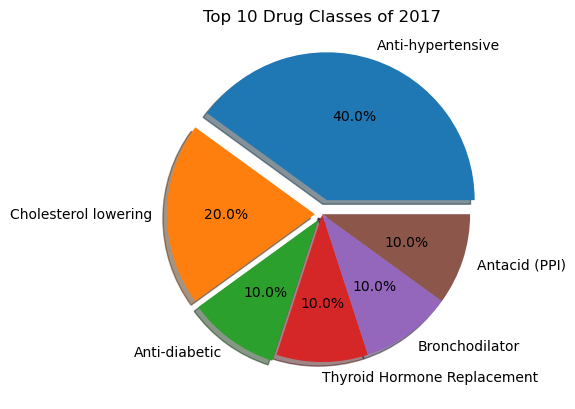

In [7]:
# Pie graph for types of medications filled in 2017

# Pull the data from the sheet we need
# Labels for the pie chart
labels = ["Anti-hypertensive", "Cholesterol lowering", "Anti-diabetic", "Thyroid Hormone Replacement", "Bronchodilator", "Antacid (PPI)"]
sizes = [4, 2, 1, 1, 1, 1]
explode = (0.1, 0.05, 0.05, 0, 0, 0)

# Plot
plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", textprops = {'fontsize': 10}, shadow = True)
plt.title("Top 10 Drug Classes of 2017")

plt.savefig("Top_10_Drug_Classes_of_2017.jpg")

plt.show()

In [8]:
# Value count of types drugs in 2021

year_2021 = '2021'
filtered_year_2021 = top_drugs_df[top_drugs_df['Year'] == 2021]
drug_class_counts_2021 = filtered_year_2021['Drug Class'].value_counts()
drug_class_counts_2021

Drug Class
Anti-hypertensive              4
Cholesterol lowering           1
Anti-diabetic                  1
Thyroid Hormone Replacement    1
Bronchodilator                 1
Antacid (PPI)                  1
Anti-convulsant                1
Name: count, dtype: int64

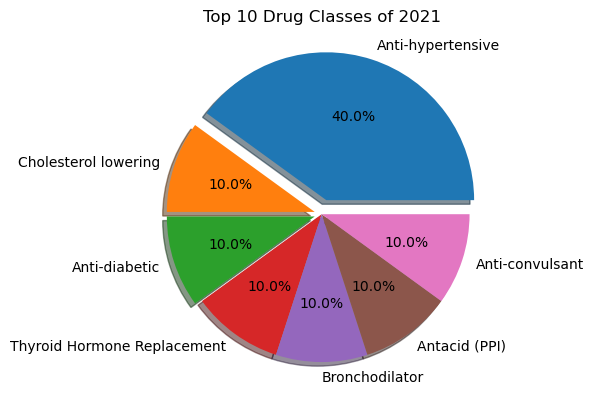

In [9]:
# Pie graph for types of medications filled in 2021

# Pull the data from the sheet we need
# Labels for the pie chart
labels = ["Anti-hypertensive", "Cholesterol lowering", "Anti-diabetic", "Thyroid Hormone Replacement", "Bronchodilator", "Antacid (PPI)", "Anti-convulsant"]
sizes = [4, 1, 1, 1, 1, 1, 1]
explode = (0.1, 0.05, 0.05, 0., 0, 0, 0)

# Plot
plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.1f%%", textprops = {'fontsize': 10}, shadow = True)
plt.title("Top 10 Drug Classes of 2021")

plt.savefig("Top_10_Drug_Classes_of_2021.jpg")

plt.show()

In [ ]:
# Bar graph showing the trend of total prescriptions filled for Atorvastatin over the years

year_x_axis = list(ator['Year'])
prescriptions_filled = list(ator['Total Prescriptions'])

plt.bar(year_x_axis, prescriptions_filled, color = "firebrick", alpha = 0.5, align = "center")

plt.xlabel("Years")
plt.ylabel("Total Prescriptions Filled")
plt.title("Total Atorvastatin Prescriptions Filled")
plt.xticks(year_x_axis, ator['Year'])

plt.savefig("Total_Atorvastatin_Prescriptions_Filled.jpg")

plt.show()

In [ ]:
# Bar graph showing the trend of total prescriptions filled for Metformin over the years

year_x_axis = list(met['Year'])
prescriptions_filled = list(met['Total Prescriptions'])

plt.bar(year_x_axis, prescriptions_filled, color = "darkgoldenrod", alpha = 0.5, align = "center")

plt.xlabel("Years")
plt.ylabel("Total Prescriptions Filled")
plt.title("Total Metformin Prescriptions Filled")
plt.xticks(year_x_axis, met['Year'])

plt.savefig("Total_Metformin_Prescriptions_Filled.jpg")

plt.show()

In [ ]:
# Bar graph showing the trend of total prescriptions filled for Omeprazole over the years

year_x_axis = list(omepra['Year'])
prescriptions_filled = list(omepra['Total Prescriptions'])

plt.bar(year_x_axis, prescriptions_filled, color = "rebeccapurple", alpha = 0.5, align = "center")

plt.xlabel("Years")
plt.ylabel("Total Prescriptions Filled")
plt.title("Total Omeprazole Prescriptions Filled")
plt.xticks(year_x_axis, omepra['Year'])

plt.savefig("Total_Omeprazole_Prescriptions_Filled.jpg")

plt.show()

In [ ]:
# Line graph for atorvastatin

x_axis_data = list(ator['Year'])
y_axis_data = list(ator['Total Cost Per Prescription'])
y_axis_data_2 = list(ator['Out of Pocket Cost Per Prescription'])

In [ ]:
plt.plot(x_axis_data, y_axis_data, marker = "o", color = "turquoise", label = "Total Cost Per Prescription")
plt.plot(x_axis_data, y_axis_data_2, marker = "^", color = "navy", label = "Out of Pocket Cost Per Prescription")

plt.xlabel("Year")
plt.ylabel("Cost in Dollars")
plt.title("Cost Per Prescription Fill for Atorvastatin")
plt.legend(loc = "best")

for i, txt in enumerate(y_axis_data):
    plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

    #plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

for i, txt in enumerate(y_axis_data_2):
    plt.annotate(txt, (x_axis_data[i], y_axis_data_2[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

plt.savefig("Cost_Per_Prescription_Fill_for_Atorvastatin.jpg")    
    
plt.show()

In [ ]:
# We can use the prices of metformin to explain the drastic increase in cost
# Explain that insurance is covering more for this medication (relate it to covid)

# Line graph

x_axis_data = list(met['Year'])
y_axis_data = list(met['Total Cost Per Prescription'])
y_axis_data_2 = list(met['Out of Pocket Cost Per Prescription'])

In [ ]:
plt.plot(x_axis_data, y_axis_data, marker = "o", color = "purple", label = "Total Cost Per Prescription")
plt.plot(x_axis_data, y_axis_data_2, marker = "^", color = "magenta", label = "Out of Pocket Cost Per Prescription")

plt.xlabel("Year")
plt.ylabel("Cost in Dollars")
plt.title("Cost Per Prescription Fill for Metformin")
plt.legend(loc = "best")

for i, txt in enumerate(y_axis_data):
    plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

    #plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

for i, txt in enumerate(y_axis_data_2):
    plt.annotate(txt, (x_axis_data[i], y_axis_data_2[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

plt.savefig("Cost_Per_Prescription_Fill_for_Metformin.jpg")    
    
    
plt.show()

In [ ]:
# Variables for omeprazole

x_axis_data = list(omepra['Year'])
y_axis_data = list(omepra['Total Cost Per Prescription'])
y_axis_data_2 = list(omepra['Out of Pocket Cost Per Prescription'])

In [ ]:
# Line graph for omeprazole (different drug class)

plt.plot(x_axis_data, y_axis_data, marker = "o", color = "dodgerblue", label = "Total Cost Per Prescription")
plt.plot(x_axis_data, y_axis_data_2, marker = "^", color = "crimson", label = "Out of Pocket Cost Per Prescription")

plt.xlabel("Year")
plt.ylabel("Cost in Dollars")
plt.title("Cost Per Prescription Fill for Omeprazole")
plt.legend(loc = "best")

for i, txt in enumerate(y_axis_data):
    plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

    #plt.annotate(txt, (x_axis_data[i], y_axis_data[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

for i, txt in enumerate(y_axis_data_2):
    plt.annotate(txt, (x_axis_data[i], y_axis_data_2[i]), textcoords = "offset points", xytext = (0, 10), ha = 'center')

plt.savefig("Cost_Per_Prescription_Fill_for_Omeprazole.jpg")    
    
    
plt.show()

In [ ]:
# The pie charts show basically the same results, so we need to explain why the data shows 60% of medications filled in the
# top 10 are medications that can help treat cardiovascular illnesses